In [1]:
#Import modules

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#Import data from CSV
combined_path = "Resources/clean_data2.csv"

In [3]:
#Import csvs
combined_df = pd.read_csv(combined_path)

In [4]:
#Read data from CSV
combined_df = pd.read_csv(combined_path)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,2,2,1,2,...,9158.0,34,18,711.0,145.0,1327.0,19.0,32.534920,-86.642749,5784
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,3,3,3,2,...,7394.0,27,16,2615.0,415.0,4791.0,20.0,30.660970,-87.749840,28388
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,3,3,1,2,...,8573.0,44,25,525.0,85.0,771.0,45.0,31.869603,-85.393197,4372
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,0,0,0,1,...,11766.0,40,20,333.0,33.0,561.0,29.0,32.998644,-87.126439,2480
4,Alabama,Blount,57322,21578,17.911111,52136.000000,0,0,0,2,...,9333.0,35,19,705.0,123.0,1316.0,22.0,33.980867,-86.567371,6070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,0,0,0,2,...,6878.0,32,16,469.0,159.0,1053.0,10.0,41.659496,-108.879431,5641
3089,Wyoming,Teton,21294,8973,8.100000,89555.250000,0,0,0,0,...,3728.0,13,12,104.0,NaN,558.0,8.0,43.934637,-110.589810,3122
3090,Wyoming,Uinta,21118,7668,14.166667,65312.666667,0,0,0,0,...,7660.0,28,15,243.0,8.0,475.0,12.0,41.287492,-110.547562,2804
3091,Wyoming,Washakie,8533,3492,14.133333,62213.666667,0,1,0,0,...,7294.0,28,14,156.0,7.0,174.0,16.0,43.904997,-107.682861,1812


In [5]:
#Calculate the 0.10 quantile. This is what will be used for the poor environment cutoff.
#According to The Locator, 10% of the roughly 65,000 census tracts in the US are food deserts.
bottomten = combined_df["Food Environment Index"].quantile(q=0.10)
bottomten

5.5

In [6]:
#Group the food environments into "healthy" or "poor" environments based on the cutoff
healthy_ninety=combined_df.loc[combined_df["Food Environment Index"]>=bottomten]
poor_ten=combined_df.loc[combined_df["Food Environment Index"]<bottomten]

In [7]:
#Creating bins based on max/min student budget values
bins = [0, float(bottomten), 10]
#bin names
ranges = ["Food Desert", "Healthy"]

In [8]:
#Slicing the data and placing into bins
binned_if_desert = pd.cut(combined_df["Food Environment Index"], bins, labels=ranges)

In [9]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [10]:
#Creating series for each parameter. Calculating the sum for Medicare enrollees and # of diabetics per category enrollment.
population_total = combined_df.groupby("Environment Category")["Original Medicare"].sum()
diabetics_total = combined_df.groupby("Environment Category")["# Diabetics"].sum()

In [11]:
#Create dataframe to hold data
popsum_byenv__deserts_df = pd.DataFrame(
    {"Medicare Population Total": population_total,
    "Medicare Diabetic Total": diabetics_total})

In [12]:
#Adding Percent Diabetic with Medicare
popsum_byenv__deserts_df["Percent Diabetic"]=(popsum_byenv__deserts_df["Medicare Diabetic Total"]/popsum_byenv__deserts_df["Medicare Population Total"])*100
percent_diabetic2_df=popsum_byenv__deserts_df.reset_index()
percent_diabetic2_df

,Environment Category,Medicare Population Total,Medicare Diabetic Total,Percent Diabetic
0,Food Desert,1531226,157268.0,10.270724
1,Healthy,36236319,3129051.0,8.635124


In [13]:
#Pie plot for Food Desert Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [159982,1403018]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

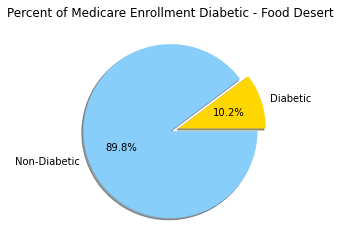

In [14]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Food Desert")
#Save plot:
plt.savefig("PiePlots/Percent of Medicare Enrollment Diabetic - Food Desert.png")
plt.show()

In [15]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [3108751,32864673]
colors = ["slateblue", "thistle"]
explode = (0.1,0)

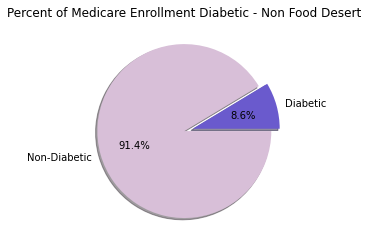

In [16]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Percent of Medicare Enrollment Diabetic - Non Food Desert.png")
plt.show()

In [17]:
#Obesity

In [18]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [19]:
#Creating series for each parameter. Calculating the average obesity rate in each environment.
obesity_average = combined_df.groupby("Environment Category")["% Obese"].mean()

In [20]:
#Create dataframe to hold data
obesity_byenv_df = pd.DataFrame(
    {"Obesity Rate Average": obesity_average})
obesity_byenv_df

,Obesity Rate Average
Environment Category,
Food Desert,33.238671
Healthy,30.808041


In [21]:
#Pie plot for Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [33.243243,100-33.243243]
colors = ["#FF5768", "#c2b2b4"]
explode = (0.1,0)

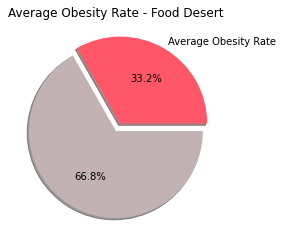

In [22]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Food Desert")
#Save plot:
plt.savefig("PiePlots/Average Obesity Rate - Food Desert.png")
plt.show()

In [23]:
#Pie plot for Non-Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [30.811594,100-30.811594]
colors = ["#57ffee", "#b1c7c4"]
explode = (0.1,0)

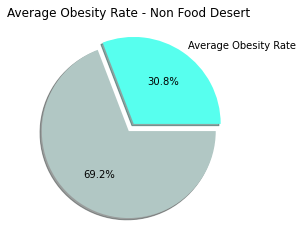

In [24]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Average Obesity Rate - Non Food Desert.png")
plt.show()


In [25]:
#% Fair/Poor Health

In [26]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [27]:
#Creating series for each parameter. Calculating the average fair/poor health rate in each environment.
poor_health_average = combined_df.groupby("Environment Category")["% Fair/Poor"].mean()

In [28]:
#Create dataframe to hold data
poorhealth_byenv_df = pd.DataFrame(
    {"Fair/Poor Health Rate Average": poor_health_average})
poorhealth_byenv_df

,Fair/Poor Health Rate Average
Environment Category,
Food Desert,21.616314
Healthy,16.445491


In [29]:
#Pie plot for Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [21.615616,100-21.615616]
colors = ["#33FFB5", "#c8dbd4"]
explode = (0.1,0)

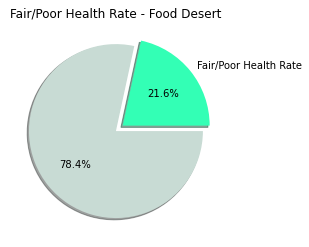

In [30]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Food Desert")
#Save plot:
plt.savefig("PiePlots/Fair Poor Health Rate - Food Desert.png")
plt.show()


In [31]:
#Pie plot for Non-Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [16.455072,100-16.455072]
colors = ["#a588fc", "#d6d1e8"]
explode = (0.1,0)

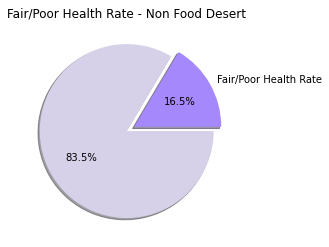

In [32]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Fair Poor Health Rate - Non Food Desert.png")
plt.show()


In [33]:
#Race breakdown
#Census defines race by five categories: White, Black, American Indian or Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Multiracial
#Added hispanic for breakdown purposes
#Calculate count of all race tracts:
whitetract=combined_df["TractWhite"].sum()
blacktract=combined_df["TractBlack"].sum()
asiantract=combined_df["TractAsian"].sum()
nhopitract=combined_df["TractNHOPI"].sum()
aiantract=combined_df["TractAIAN"].sum()
omultirtract=combined_df["TractOMultir"].sum()
hispanictract=combined_df["TractHispanic"].sum()

In [34]:
all_tract=whitetract+blacktract+asiantract+nhopitract+aiantract+hispanictract
all_tract

329481134

In [35]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [36]:
#Creating series for each parameter. Calculating the sum of enrollees by race, grouped by environment.
white_pop = combined_df.groupby("Environment Category")["TractWhite"].sum()
black_pop = combined_df.groupby("Environment Category")["TractBlack"].sum()
asian_pop = combined_df.groupby("Environment Category")["TractAsian"].sum()
nhopi_pop = combined_df.groupby("Environment Category")["TractNHOPI"].sum()
aian_pop = combined_df.groupby("Environment Category")["TractAIAN"].sum()
omultir_pop = combined_df.groupby("Environment Category")["TractOMultir"].sum()
hispanic_pop = combined_df.groupby("Environment Category")["TractHispanic"].sum()

In [37]:
#Create dataframe to hold data
race_sum_deserts_df = pd.DataFrame(
    {"White": white_pop,
    "Black": black_pop,
    "Asian": asian_pop,
    "NHOPI": nhopi_pop,
    "AIAN": aian_pop,
    "Other/Multi": omultir_pop,
    "Hispanic/Latinx": hispanic_pop})
race_sum_deserts_df.reset_index()

,Environment Category,White,Black,Asian,NHOPI,AIAN,Other/Multi,Hispanic/Latinx
0,Food Desert,6048719,3948444,169211,11480,438434,621001,988722
1,Healthy,217087544,33871990,14635995,525799,2454102,27378974,49296655


Text(0.5, 1.0, 'Non-Food Desert')

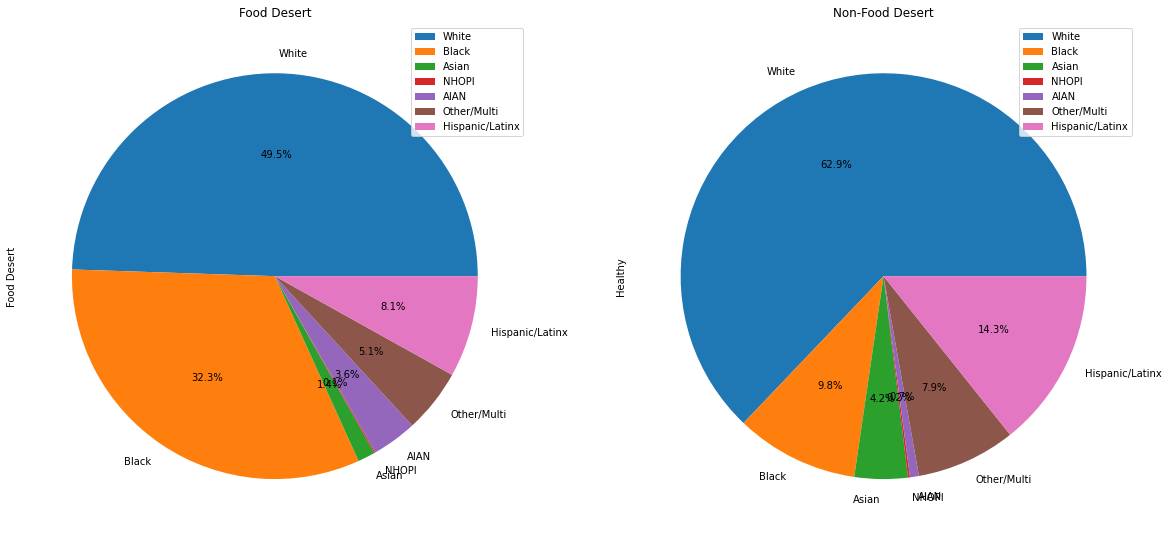

In [38]:
#Creating pie chart for Food Desert

race_pie =race_sum_deserts_df.T.plot.pie(subplots=True, figsize=(20,20),autopct='%1.1f%%')
race_pie[0].set_title("Food Desert")
race_pie[1].set_title("Non-Food Desert")


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


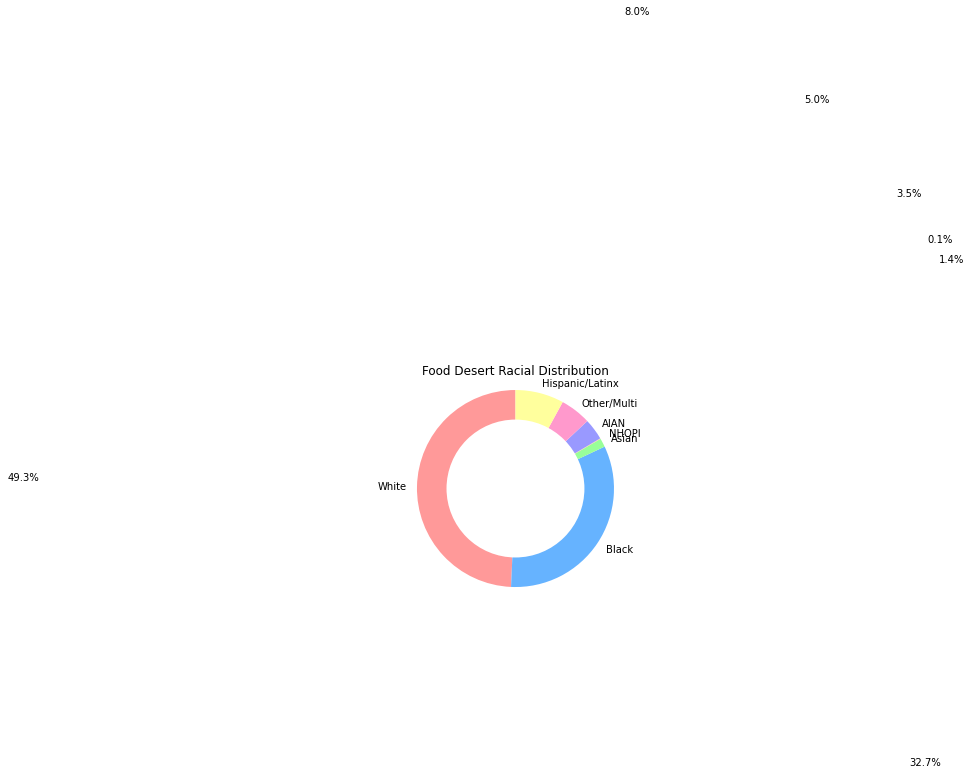

<Figure size 2160x3600 with 0 Axes>

In [39]:
#Race Pie Chart Easier to Read
#Food Desert:
# Pie chart
labels = ['White', 'Black', 'Asian', 'NHOPI','AIAN','Other/Multi','Hispanic/Latinx']
sizes = [6192366,4110488,178566,11556,439300,632889,999993]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ff99cc','#ffff9d']




fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=5)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Food Desert Racial Distribution")
fig=plt.figure(figsize=(30,50))
plt.show()
# #Save plot:
# plt.savefig("PiePlots/Food Desert Racial Distribution.png")
# plt.show()


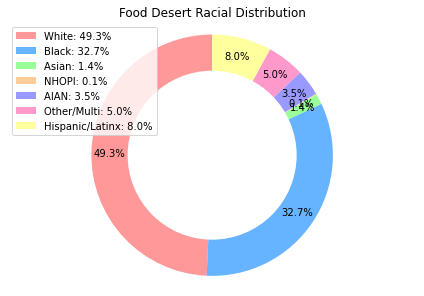

In [40]:
#Race Pie Chart Easier to Read
#Food Desert:
# Pie chart
labels = ['White: 49.3%', 'Black: 32.7%', 'Asian: 1.4%', 'NHOPI: 0.1%','AIAN: 3.5%','Other/Multi: 5.0%','Hispanic/Latinx: 8.0%']
sizes = [6192366,4110488,178566,11556,439300,632889,999993]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ff99cc','#ffff9d']




fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Food Desert Racial Distribution")
plt.legend(labels)


plt.savefig("PiePlots/Food Desert Racial Distribution.png")
plt.show()



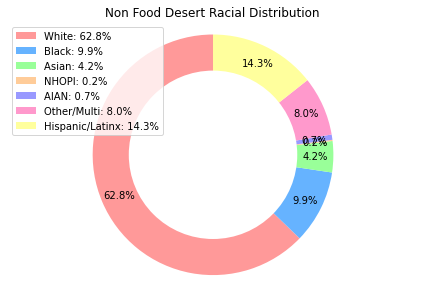

In [41]:
#Race Pie Chart Easier to Read
#Non Food Desert:
# Pie chart
labels = ['White: 62.8%', 'Black: 9.9%', 'Asian: 4.2%', 'NHOPI: 0.2%','AIAN: 0.7%','Other/Multi: 8.0%','Hispanic/Latinx: 14.3%']
sizes = [215548737,33849445,14395563,524949,2451822,27294395,49250707]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#9999ff','#ff99cc','#ffff9d']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Non Food Desert Racial Distribution")
plt.legend(labels)

plt.savefig("PiePlots/Non Food Desert Racial Distribution.png")
plt.show()



In [42]:
#Calculating death # in Food Desert environment
poor_env_deaths=poor_ten["# Deaths"].sum()
print(poor_env_deaths)

146141.0


In [43]:
#Calculating death # in Healthy environment
healthy_env_deaths=healthy_ninety["# Deaths"].sum()
print(healthy_env_deaths)

3256220.0


In [44]:
#Calculating nationwide death #
all_deaths=combined_df["# Deaths"].sum()
all_deaths

3402361.0

In [45]:
#Pie plot for Food Desert Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Deaths in Food Desert","Deaths in Healthy Environment"]
sizes =  [159982,1403018]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

In [46]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [3108751,32864673]
colors = ["slateblue", "thistle"]
explode = (0.1,0)